# Trabalho 2 - Unidade 2
  - Alunos: **Fernando Lucas & Teophilo Vitor**
  - O Objetivo do trabalho realizar estudos sobre um dataset com informações sobre viagens de avião realizadas no Brasil. 

## Implementação - Importação e Instalação de ferramentas necessárias para análises realizadas no dataset

In [ ]:
!pip install nxviz=='0.6.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [ ]:
# import usefull packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nxviz as nv
import seaborn as sns

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nxviz 0.6.3 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
# download the dataset 
!gdown https://drive.google.com/uc?id=1FlW4nLsxFxlqdZMUN_ciCNjQtUVlrSux

Downloading...
From: https://drive.google.com/uc?id=1FlW4nLsxFxlqdZMUN_ciCNjQtUVlrSux
To: /content/dataset_flights_brazil.zip
100% 112M/112M [00:00<00:00, 217MB/s] 


In [ ]:
!unzip dataset_flights_brazil

Archive:  dataset_flights_brazil.zip
replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: README.md               
  inflating: requirements.txt        
  inflating: transform_to_airports_csv.py  
  inflating: transform_to_anac_csv.py  
  inflating: transform_to_graphml.py  
  inflating: .git/config             
  inflating: .git/description        
  inflating: .git/HEAD               
  inflating: .git/hooks/applypatch-msg.sample  
  inflating: .git/hooks/commit-msg.sample  
  inflating: .git/hooks/fsmonitor-watchman.sample  
  inflating: .git/hooks/post-update.sample  
  inflating: .git/hooks/pre-applypatch.sample  
  inflating: .git/hooks/pre-commit.sample  
  inflating: .git/hooks/pre-merge-commit.sample  
  inflating: .git/hooks/pre-push.sample  
  inflating: .git/hooks/pre-rebase.sample  
  inflating: .git/hooks/pre-receive.sample  
  inflating: .git/hooks/prepare-commit-msg.sample  
  inflating: .git/hooks/push-to-checkout.sample  
  inflating: .git/hooks/upd

In [ ]:
!python extract.py

100% 23/23 [00:00<00:00, 136448.36it/s]


In [ ]:
!python transform_to_anac_csv.py

transform_to_anac_csv.py:7: DtypeWarning: Columns (24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.
  combined_csv = pd.concat([pd.read_csv(file, sep=';', encoding='ISO-8859-1') for file in files])


In [ ]:
!python transform_to_airports_csv.py

Traceback (most recent call last):
  File "transform_to_airports_csv.py", line 1, in <module>
    import geocoder
ModuleNotFoundError: No module named 'geocoder'


In [ ]:
!python transform_to_graphml.py

sys:1: DtypeWarning: Columns (24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.


## Implementação 1

- Realizar um estudo sobre a 
assortatividade da rede 
considerando como atributo a 
REGIÃO onde está localizado o 
aeroporto.
- Gerar um gráfico que demonstra assortatividade considerando como grupo a 
REGIÃO do aeroporto.


In [ ]:
G = nx.read_graphml('data/air_traffic.graphml')
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1116 nodes and 9975 edges


In [ ]:
# Just look how the nodes are represented in the Network
G.nodes(data=True)

In [ ]:
nx.write_graphml(G, path='data/air_traffic_brazil.graphml')

In [ ]:
G = nx.read_graphml('data/air_traffic_brazil.graphml')

In [ ]:
for i in G.nodes():
  if pd.isna(G.nodes[i]['region']):
    G.nodes[i]['region'] = "EXTERIOR"

In [ ]:
nodes1 = []
for i in G.nodes():
  if G.nodes[i]['region'] == "NORDESTE" or G.nodes[i]['region'] == "NORTE" or G.nodes[i]['region'] == "SUDESTE" or G.nodes[i]['region'] == "SUL" or G.nodes[i]['region'] == "CENTRO-OESTE":
    nodes1.append(i)

In [ ]:
G = G.subgraph(nodes1)

In [ ]:
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 495 nodes and 4484 edges


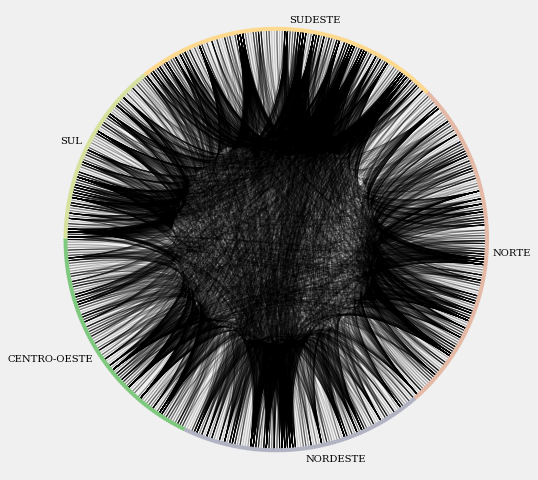

In [ ]:
# Create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,8))

# Draw c to the screen
c.draw()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

In [ ]:
# assortativity of the network based on attribute group
# value was close to 1, in other words, it is a assortative network
# similar groups tend to connect with yourselves members.
nx.attribute_assortativity_coefficient(G,"region")

0.3676599700857439

In [ ]:
# mixing matrix
# dimension of this matrix is proportional to number of groups
# in this case, 4 row and 4 coluns
e = nx.attribute_mixing_matrix(G,'region')
e

array([[0.1338091 , 0.00713649, 0.02297056, 0.02776539, 0.02074041],
       [0.00713649, 0.07114184, 0.01215433, 0.04025424, 0.01349242],
       [0.02297056, 0.01215433, 0.05240856, 0.03412132, 0.01070473],
       [0.02776539, 0.04025424, 0.03412132, 0.17239072, 0.05564228],
       [0.02074041, 0.01349242, 0.01070473, 0.05564228, 0.08028546]])

## Implementação 2
- Realizar uma análise bivariada 
entre o grau do vértice e o 
número médio de vizinhos.
- Gerar um gráfico que demonstra os graus dos nós 
considerando a rede do 
Brasil e de todas as 
Regiões (Norte, Nordeste, 
Sul, Sudeste e 
Centro-Oeste). 

In [ ]:
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


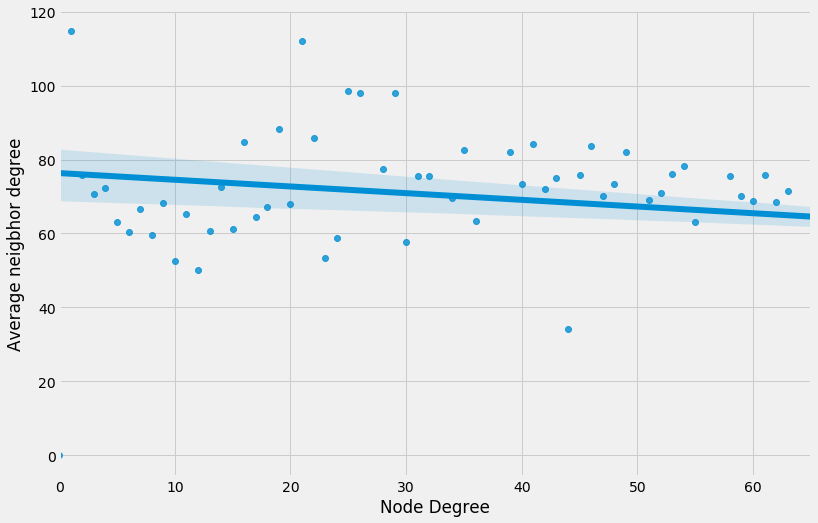

Valor de assortatividade:  0.3676599700857439


In [ ]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()
print("Valor de assortatividade: ", str(nx.attribute_assortativity_coefficient(G,"region")))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


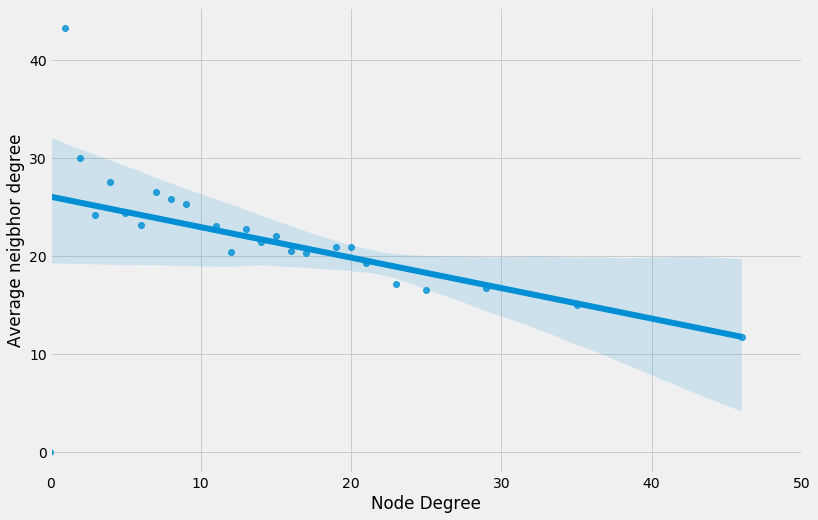

Valor de assortatividade:  -0.3642089800405845


In [ ]:
n_sul = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'SUL':
      n_sul.append(i)
G_sul = G.subgraph(n_sul)

# average degree of neighbors
d_sul, avg_neigh_d_sul = zip(*nx.average_degree_connectivity(G_sul).items())

# convert to list
d_sul = list(d_sul)
avg_neigh_d_sul = list(avg_neigh_d_sul)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_sul,avg_neigh_d_sul,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,50)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_sul,"region")))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


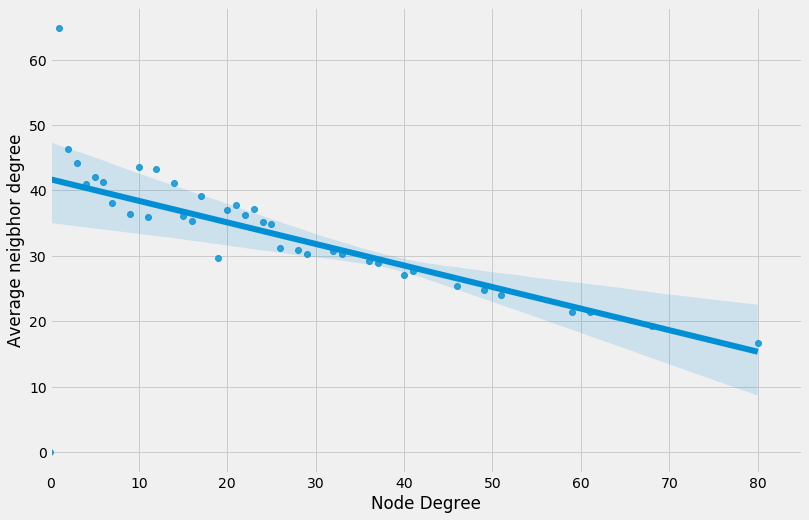

Valor de assortatividade:  -0.3704832113636029


In [ ]:
n_sudeste = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'SUDESTE':
      n_sudeste.append(i)
G_sudeste = G.subgraph(n_sudeste)

# average degree of neighbors
d_sudeste, avg_neigh_d_sudeste = zip(*nx.average_degree_connectivity(G_sudeste).items())

# convert to list
d_sudeste = list(d_sudeste)
avg_neigh_d_sudeste = list(avg_neigh_d_sudeste)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_sudeste,avg_neigh_d_sudeste,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,85)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_sudeste,"region")))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


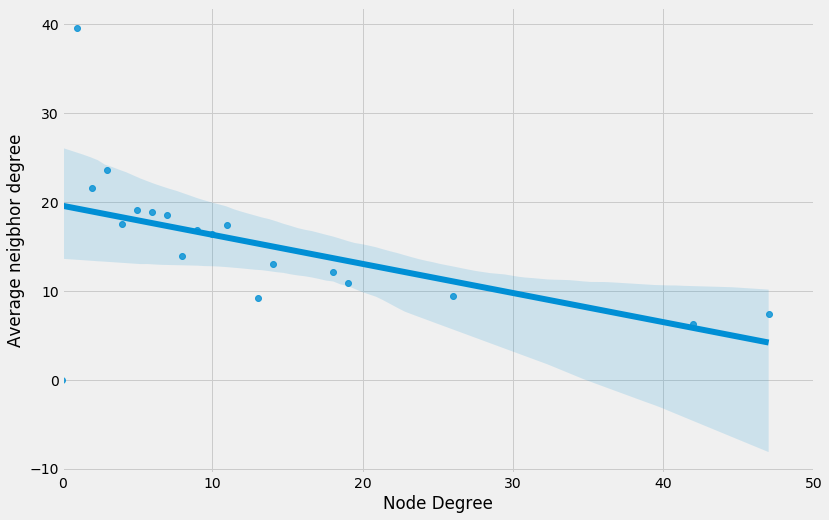

Valor de assortatividade:  -0.35112974166992394


In [ ]:
n_centro_oeste = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'CENTRO-OESTE':
      n_centro_oeste.append(i)
G_centro_oeste = G.subgraph(n_centro_oeste)

# average degree of neighbors
d_centro_oeste, avg_neigh_d_centro_oeste = zip(*nx.average_degree_connectivity(G_centro_oeste).items())

# convert to list
d_centro_oeste = list(d_centro_oeste)
avg_neigh_d_centro_oeste = list(avg_neigh_d_centro_oeste)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_centro_oeste,avg_neigh_d_centro_oeste,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,50)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_centro_oeste,"region")))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


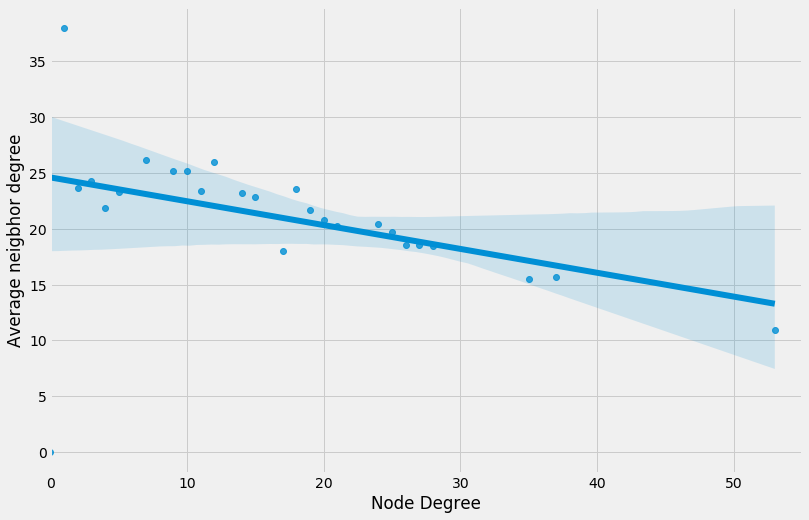

Valor de assortatividade:  -0.3193549525790466


In [ ]:
n_nordeste = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'NORDESTE':
      n_nordeste.append(i)
G_nordeste = G.subgraph(n_nordeste)

# average degree of neighbors
d_nordeste, avg_neigh_d_nordeste = zip(*nx.average_degree_connectivity(G_nordeste).items())

# convert to list
d_nordeste = list(d_nordeste)
avg_neigh_d_nordeste = list(avg_neigh_d_nordeste)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_nordeste,avg_neigh_d_nordeste,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,55)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_nordeste,"region")))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


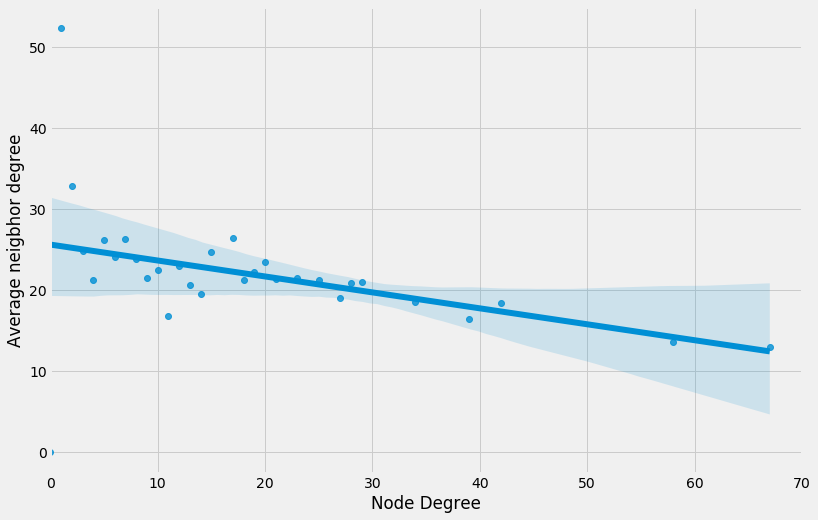

Valor de assortatividade:  -0.2201013510739867


In [ ]:
n_norte = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'NORTE':
      n_norte.append(i)
G_norte = G.subgraph(n_norte)

# average degree of neighbors
d_norte, avg_neigh_d_norte = zip(*nx.average_degree_connectivity(G_norte).items())

# convert to list
d_norte = list(d_norte)
avg_neigh_d_norte = list(avg_neigh_d_norte)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_norte,avg_neigh_d_norte,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,70)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_norte,"region")))

## Implementação 3
- Quantos componentes conectados existem na malha aérea 
brasileira?
  - Caracterize cada componente: quantidade, porcentagem por 
região


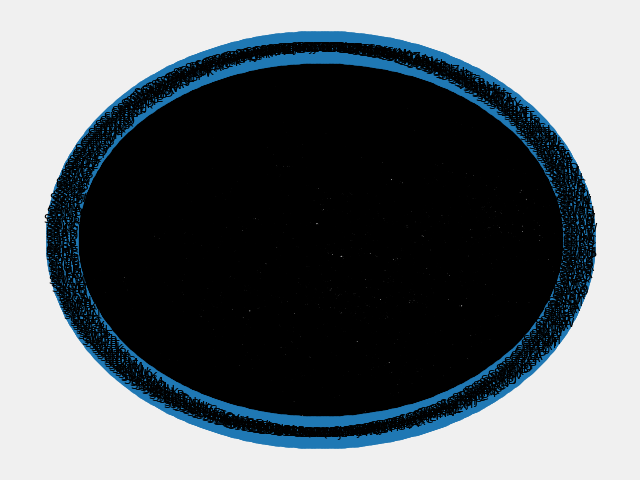

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G, ax=ax,node_size=1000, pos=nx.circular_layout(G))
plt.axis("off")
plt.show()

 - Não há visualização clara do gráfico devido às muitas conexões e código dos nós, no entanto, realizando a plotagem para cada região a visualização melhora razoavelmente.

In [ ]:
for component in nx.connected_components(G):
  print(component)

{'SBMC', 'SDJA', 'SNAV', 'SDLK', '2NHT', 'SNQW', 'SSPB', 'SBSN', 'SDVG', 'SNXW', 'SNVS', 'SWPD', 'SWBU', 'SNNT', 'SDAA', 'SBFN', 'SNBW', 'SDOV', 'SBIT', 'SNGQ', 'SBJU', 'SSKM', 'SSCR', 'SWVC', 'SBML', 'SNPG', 'SDOU', 'SNJN', 'SSRS', 'SNKE', 'SBAE', 'SNDM', 'SNMD', 'SWII', 'SWUA', 'SWBE', 'SBPG', 'SNZR', 'SBCF', 'SBIH', 'SBQV', 'SDAG', 'SWEU', 'SSOU', 'SSUM', 'SWOB', 'SBSP', 'SNHS', 'SNMU', 'SBJA', 'SSPI', 'SSBG', 'SBCP', 'SBLS', 'SJLU', 'SBAT', 'SIXE', 'SSBN', 'SSLT', 'SJHG', 'SILJ', 'SNGX', 'SIKC', 'SBUY', 'SNYA', 'SWPF', 'SWSQ', 'SBAF', 'SNDH', 'SDIM', 'SWFE', 'SNBM', 'SNBU', 'SBFI', 'SBUL', 'SSSB', 'SJRG', 'SBEG', 'SBLE', 'SBCJ', 'SNVR', 'SBRG', '1AON', 'SBCH', 'SBIL', 'SNMZ', 'SNTI', 'SNJR', 'SNIP', 'SSAC', 'SBJE', 'SWNH', 'SBGU', 'SNBR', 'SWYN', 'SNAR', 'SBGV', 'SISO', 'SWBZ', 'SIGP', 'SBCO', 'SBMK', 'SNSW', 'SDLU', 'SDBK', 'SBBV', 'SWCB', 'SBAN', 'SNOS', 'SSZW', 'SNKK', 'SBAU', 'SBMG', 'SBTG', 'SBTS', 'SIZX', 'SWRP', 'SDWQ', 'SWUQ', 'SBHT', 'SSSK', 'SNCB', 'SBVT', 'SWHG', 'SJUR',

In [ ]:
# which connected component is a node N?
nx.node_connected_component(G,"SNGR")

{'SNGR'}

In [ ]:
# how many connected components has G?
nx.number_connected_components(G)

5

 - Desenvolvimento do código que irá demonstrar de cada conexão quantas existem em cada região especificamente e a porcentagem com relação ao total de conexões daquele nó.

In [ ]:
for component in nx.connected_components(G):
  sul = 0
  sudeste = 0
  centro_oeste = 0
  norte = 0
  nordeste = 0
  for i in component:
    region = G.nodes[i]['region']
    if region == "SUL":
      sul += 1 
    if region == "SUDESTE":
      sudeste += 1
    if region == "CENTRO-OESTE":
      centro_oeste += 1
    if region == "NORTE":
      norte += 1
    if region == "NORDESTE":
      nordeste += 1
  total = (sul + sudeste + centro_oeste + norte + nordeste)
  p_no = norte*100/total
  p_ne = nordeste*100/total
  p_sul = sul*100/total
  p_sud = sudeste*100/total
  p_co = centro_oeste*100/total
  print("Quantidade de componentes connectados por região: \n")
  print("Sul: ", str(sul), "\nSudeste: ", str(sudeste), "\nCentro-Oeste: ", str(centro_oeste), "\nNorte: ", str(norte), "\nNordeste: ", str(nordeste), "\nTotal: ", str(total), "\n")
  print("Quantidade da porcentagem de componentes connectados por região: \n")
  print("Sul: ", str(p_sul), "\nSudeste: ", str(p_sud), "\nCentro-Oeste: ", str(p_co), "\nNorte: ", str(p_no), "\nNordeste: ", str(p_ne), "\n")

Quantidade de componentes connectados por região: 

Sul:  70 
Sudeste:  115 
Centro-Oeste:  88 
Norte:  126 
Nordeste:  92 
Total:  491 

Quantidade da porcentagem de componentes connectados por região: 

Sul:  14.256619144602851 
Sudeste:  23.421588594704684 
Centro-Oeste:  17.922606924643585 
Norte:  25.661914460285132 
Nordeste:  18.73727087576375 

Quantidade de componentes connectados por região: 

Sul:  0 
Sudeste:  0 
Centro-Oeste:  0 
Norte:  1 
Nordeste:  0 
Total:  1 

Quantidade da porcentagem de componentes connectados por região: 

Sul:  0.0 
Sudeste:  0.0 
Centro-Oeste:  0.0 
Norte:  100.0 
Nordeste:  0.0 

Quantidade de componentes connectados por região: 

Sul:  0 
Sudeste:  0 
Centro-Oeste:  1 
Norte:  0 
Nordeste:  0 
Total:  1 

Quantidade da porcentagem de componentes connectados por região: 

Sul:  0.0 
Sudeste:  0.0 
Centro-Oeste:  100.0 
Norte:  0.0 
Nordeste:  0.0 

Quantidade de componentes connectados por região: 

Sul:  0 
Sudeste:  1 
Centro-Oeste:  0 
Norte

## Implementação 4
  - Crie um cenário simulado, onde se deseja fazer uma 
viagem com o seguinte trajeto:
    - cidade 1 (Norte) para cidade 2 (Sul)
    - cidade 2 (Sul) para cidade 3 (Nordeste)
    - cidade 3 (Nordeste) para cidade 4 (Centro-Oeste)
    - cidade 4 (Centro-Oeste) para cidade 5 (Sudeste)

In [ ]:
G_norte.nodes(data=True)

In [ ]:
G_nordeste.nodes(data=True)

In [ ]:
G_sul.nodes(data=True)

In [ ]:
G_sudeste.nodes(data=True)

In [ ]:
G_centro_oeste.nodes(data=True)

In [ ]:
destinos = {    
    'destino_norte': 'SBBE',         # BELÉM
    'destino_nordeste': 'SBSG',      # SÃO GONÇALO DO AMARANTE
    'destino_sul': 'SBGS',           # PONTA GROSSA
    'destino_sudeste': 'SDMC',       # MARICÁ
    'destino_centro_oeste': 'SIQE'   # BRASÍLIA
    }    

In [ ]:
# Viagem 1
caminho = nx.shortest_path(G, destinos['destino_norte'], destinos['destino_sul'])
print("Viagem 1 (Belém -> Ponta Grossa): ")
print(caminho)
print(f"{G.nodes[caminho[0]]['name']} -> {G.nodes[caminho[1]]['name']} -> {G.nodes[caminho[2]]['name']}\n")

# Viagem 2
caminho = nx.shortest_path(G, destinos['destino_sul'], destinos['destino_nordeste'])
print("Viagem 2 (Ponta Grossa -> São Gonçalo do Amarante): ")
print(caminho)
print(f"{G.nodes[caminho[0]]['name']} -> {G.nodes[caminho[1]]['name']} -> {G.nodes[caminho[2]]['name']}\n")

# Viagem 3
print("Viagem 3 (São Gonçalo do Amarante -> Brasília): ")
caminho = nx.shortest_path(G, destinos['destino_nordeste'], destinos['destino_centro_oeste'])
print(caminho)
print(f"{G.nodes[caminho[0]]['name']} -> {G.nodes[caminho[1]]['name']} -> {G.nodes[caminho[2]]['name']}\n")

# Viagem 4
print("Viagem 4 (Brasília -> Maricá): ")
caminho = nx.shortest_path(G, destinos['destino_centro_oeste'], destinos['destino_sudeste'])
print(caminho)
print(f"{G.nodes[caminho[0]]['name']} -> {G.nodes[caminho[1]]['name']} -> {G.nodes[caminho[2]]['name']} -> {G.nodes[caminho[3]]['name']}")

Viagem 1 (Belém -> Ponta Grossa): 
['SBBE', 'SBCT', 'SBGS']
BELÉM -> SÃO JOSÉ DOS PINHAIS -> PONTA GROSSA

Viagem 2 (Ponta Grossa -> São Gonçalo do Amarante): 
['SBGS', 'SBCT', 'SBSG']
PONTA GROSSA -> SÃO JOSÉ DOS PINHAIS -> SÃO GONÇALO DO AMARANTE

Viagem 3 (São Gonçalo do Amarante -> Brasília): 
['SBSG', 'SBGO', 'SIQE']
SÃO GONÇALO DO AMARANTE -> GOIÂNIA -> BRASÍLIA

Viagem 4 (Brasília -> Maricá): 
['SIQE', 'SBGO', 'SBGL', 'SDMC']
BRASÍLIA -> GOIÂNIA -> RIO DE JANEIRO -> MARICÁ
